# Определение наиболее выгодного региона нефтедобычи.

Мы работаем в добывающей компании «ГлавРосГосНефть». Необходимо решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:
1) В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
2) Строят модель для предсказания объёма запасов в новых скважинах;
3) Выбирают скважины с самыми высокими оценками значений;
4) Определяют регион с максимальной суммарной прибылью отобранных скважин.

Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль, а так же проанализировать возможную прибыль и риски техникой Bootstrap.


**Описание данных:**

Данные геологоразведки трёх регионов находятся в файлах:\
/datasets/geo_data_0.csv.\
/datasets/geo_data_1.csv.\
/datasets/geo_data_2.csv.

**id** — уникальный идентификатор скважины;\
**f0, f1, f2** — три признака точек (неважно, что они означают, но сами признаки значимы);\
**product** — объём запасов в скважине (тыс. баррелей).

**Цель исследования:** 

Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль, а так же проанализировать возможную прибыль и риски техникой Bootstrap.

**Ход исследования:**

**1. Загрузим и подготовим данные, поясняя порядок действий.** 

**2. Обучим и проверим модель для каждого региона:** \
 **2.1.** Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.\
 **2.2.** Обучим модель и сделаем предсказания на валидационной выборке.\
 **2.3.** Напечатаем на экране средний запас предсказанного сырья и RMSE модели.\
 
**3. Подготовим данные к расчёту прибыли:** \
 **3.1.** Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.\
 **3.2.** Сравним полученный объём сырья со средним запасом в каждом регионе.
 
**4. Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:** \
 **4.1.** Выберирем скважины с максимальными значениями предсказаний.\
 **4.2.** Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.\
 **4.3.** Рассчитаем прибыль для полученного объёма сырья.
 
**5. Посчитайте риски и прибыль для каждого региона:** \
 **5.1.** Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.\
 **5.2.** Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.\
 **5.3.** Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.
 
**Дополнительные условия задачи:** \
Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).\
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.\
Бюджет на разработку скважин в регионе — 10 млрд рублей.\
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.\
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.\
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

**Исследование пройдет в пять этапов:** 

1) Изучение общей информации о данных и подготовка их к исследованию.
2) Обучение и проверка модели для каждого региона.
3) Подготовка данных к расчёту прибыли.
4) Реализация функции для расчёта прибыли по выбранным скважинам и предсказаниям модели.
5) Расчет рисков и прибыли для каждого региона.
6) Общий вывод.

# 1. Изучение общей информации о данных и подготовка к исследованию. 

In [1]:
#!pip install pandas-profiling

In [2]:
# импортируем необходимые библиотеки
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
import numpy as np
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sweetviz as sv
#from pandas_profiling import ProfileReport

n = 3
STATE = np.random.RandomState(12345)

In [3]:
# загрузим файлы и веведем всю необходимую информацию о данных для изучения
data = []
for i in range(n):
    try: 
        data.append(pd.read_csv(f'/Users/Slava/Desktop/Яндекс Практикум учебные материалы/Проекты/Проект8./geo_data_{i}.csv', sep = ','))
    except: 
        data.append(pd.read_csv(f'data/geo_data_{i}.csv'))
    print(f'Регион {i+1}')
    print('')
    print('Выведем первые 10 строк набора данных, ознакомимся с признаками и объектами')
    print('')
    print(data[i].head(10))
    print('')
    print('Описательная статистика набора данных')
    print('')
    print(data[i].describe())
    print('')
    print('Общая информация о данных')
    print('')
    print(data[i].info())
    print('')
    print('Проверка данных на пропуски')
    print('')
    print(data[i].isna().sum())
    print('\n\n')

Данные каждого региона содержат 100000 записей, пропусков отсутствуют, типы данных корректны. Столбец идентификатора скважины никак не влияет на исследование, поэтому исключим его из данных. 
В общем и целом данные идентичны по форме и готовы к исследовванию.

In [4]:
for i in range(n):
    data[i] = data[i].drop(['id'], axis=1)
    print(f'Регион {i+1}')
    print(data[i].head())
    print('')

Оценим взаимную корреляцию признаков датасетов:

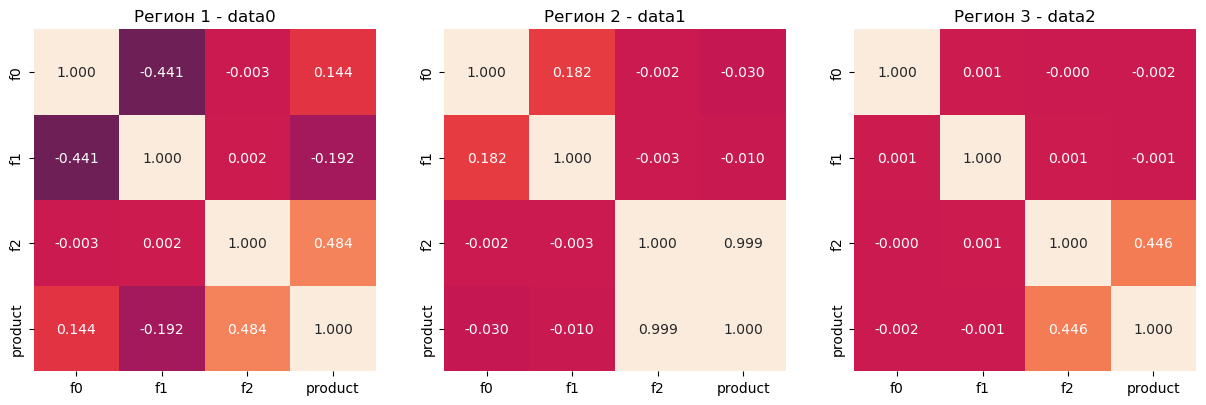

In [5]:
fig = plt.figure(figsize = (15,10))

name = ['Регион 1 - data0', 'Регион 2 - data1', 'Регион 3 - data2']
for i in range(n): 
    ax = fig.add_subplot(1, 3, i+1)
    sns.heatmap(data[i].corr(), ax=ax, square=True, annot=True, fmt='.3f', vmax=1, vmin=-1, cbar=False)
    ax.set_title(name[i])

Видим для датасета Региона 2 очень высокий коэффициент корреляции Пирсона равным ~ 1  между f2 и product.
Для двух других датасетов так же наблюдается умеренная линейная зависимость на уровне ~ 0.5. 

В каждой таблице 3 признака - f0, f1 и f2 (их значение не разглашено, но они значимы), и целевой признак - 'product'. Оценим разброс значений признаков в каждой таблице.

In [6]:
for i in range(n):
    print(f'Регион {i+1}')
    print(data[i].drop('product', axis=1).max() - data[i].drop('product', axis=1).min())
    print()

Исходя из полученных значений, разброс признаков не велик, масштаб соотносим. Масштабирование не особо повлияет на работу модели, к тому же мы не знаем что это за признаки и их значимость. Оставим данные без изменений.

**Выводы:**

В процессе подготовки данных были проведены следующие операции:

Были загруженны три локальных и удаленных файла с данными. Данные хорошо подготовлены, пропуски отсутствуют, изменение типа данных не требуется. Категориальные признаки отсутствуют.

Удален признак 'id' (уникальный идентификатор скважины), не влияющий на результаты исследования.
Изучены данные на мультиколлинеарность признаков. Наблюдается сильная линейная зависимость между 'f2' и 'product' в data1, равная ~ 1.
Для обучения моделей следует использовать линейную регрессию, поэтому Масштабирование численных признаков проводить не нужно.\
Данные готовы к исследованию.

In [20]:
for i in range(n):
    report = sv.analyze([data[i], 'oil_project'])
    report.show_html('common analysis.html')
    print(report)

In [8]:
#for i in range(n):
    #profile = ProfileReport(data[i], title="Pandas Profiling Report")
    #print(profile)

# 2. Обучение и проверка модели для каждого региона.

## 2.1. Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.

In [9]:
# создадим пустые массивы для использования цикла для трех наборов данных
features_train = [0] * n
features_valid = [0] * n
target_train = [0] * n
target_valid = [0] * n
# делим датасеты на выборки в цикле
for i in range(n):
    features_train[i], features_valid[i], target_train[i], target_valid[i] = train_test_split(
        data[i].drop('product', axis=1), data[i]['product'], test_size=0.25, random_state=STATE
    )

## 2.2. Обучим модель и сделаем предсказания на валидационной выборке.

По условию для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые). Построим модель, сохраним предсказания и правильные ответы на валидационной выборке.

In [10]:
# создадим пустые массивы для построения моделей
models = [0] * n
predicted_valid = [0] * n
# обучаем наборы данных в цикле с помощью модели линейной регрессии
for i in range(n):
    models[i] = LinearRegression()
    models[i].fit(features_train[i], target_train[i])
    predicted_valid[i] = pd.Series(models[i].predict(features_valid[i]))

## 2.3. Рассчитаем средний запас предсказанного сырья и RMSE модели для каждого региона.

In [11]:
# выведем результаты работы модели для каждого региона
for i in range(n):
    print(f'Регион {i+1}')
    print(f'Средний запас: предсказанного сырья: {predicted_valid[i].mean()}, фактического сырья: {target_valid[i].mean()}')
    print(f'RMSE модели: {mean_squared_error(target_valid[i], predicted_valid[i], squared=False)}')
    print()

**Выводы:**

Данные разделены на обучающую и валидационную выборки в соотношении 75:25. Созданы и обучены модели LinearRegression.
Выполнены предсказания на валидационной выборке.Сделаны предсказания по объёму сырья в скважинах.

Рассчитан средний запас предсказанного сырья и RMSE модели для каждого региона:
1) для 'Региона 2 - датасет data 1', RMSE модели = 0.89. Столь низкие значения, связаны с переобучением модели, так как корреляция между 'f2' и 'product' ~ равна 1.
2) для 'Региона 1 - датасет data 0' и для 'Региона 3 - датасет data 2' получены значения RMSE = 37.57 и RMSE = 40.02. Существенная разница по сравнению с средним запасом предсказанного сырья говорит о сильном разбросе данных в валидационных выборках датасетов.
3) для 'Региона 2 - датасет data 1' имеем самые низкие запасы предсказанного сырья. Всего 68 тыс. баррелей против 92 - 94 тыс. для других регионов.

# 3. Подготовка данных к расчёту прибыли.

## 3.1. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

Для расчета прибыли учтем дополнительные условия задачи:
1) При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
2) Бюджет на разработку скважин в регионе — 10 млрд рублей.
3) При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
4) После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

На основе дополнительных условий подготовим переменные.

In [12]:
TOTAL_POINTS_AMOUNT = 500  # общее количество точек исследования при разведке региона
CHOSEN_POINTS_AMOUNT = 200  # выбор лучших точек  
BUDGET = 1e10  # стоимость разработки скважин в регионе
INCOME_PER_PRODUCT = 4.5e5  # доход с единицы продукта
ALPHA = 0.025  # оставляют лишь те регионы, в которых вероятность убытков меньше 2.5% процентов 

Рассчитаем средний (минимальный) необходимый объём сырья с каждой новой скважины, достаточный для безубыточной разработки новых скважин учитывая вводные данные.

In [13]:
min_mean_product = BUDGET / (INCOME_PER_PRODUCT * CHOSEN_POINTS_AMOUNT) 
print(min_mean_product)

## 3.2. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [14]:
for i in range(n):
    print(f'Средний запас скважин в регионе {i+1}: {target_valid[i].mean()}')

Во всех регионах средний запас скважин меньше минимального для безубыточной разработки новых скважин. 
В целом можно сделать вывод, что вести разработку всех скважин региона в данном исследовании нерентабельно.

# 4. Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели.

Напишем функцию для расчёта прибыли по предсказаниям модели. На вход она принимает предсказания модели на некоторой выборке, отбирает лучшие скважины (наибольшие значения) из этой выборки по предсказаниям модели, а затем считает доход от разработки выбранных скважин по реальным запасам.

In [15]:
def count_income(predicted_product, real_product, num_of_points_to_choose, income_per_product, budget):
    # выбираем индексы из точек num_of_points_to_choose лучшие (наибольшие) по предсказанным запасам 
    chosen_indexes = predicted_product.sort_values(ascending=False)[:num_of_points_to_choose].index
    
    # суммируем запасы в них
    total_product_amount = real_product.iloc[chosen_indexes].sum()
    
    # рассчитываем прибыль при их разработке
    return total_product_amount * income_per_product - budget

# 5. Расчет рисков и прибыли для каждого региона.

Рассчитаем распределение прибыли для каждого региона техникой Bootstrap с 1000 выборок.

In [16]:
samples_amount = 1000
incomes = [[0] * samples_amount for region in range(n)]

for region in range(n):
    for i in range(samples_amount):
        predicted_subsample = predicted_valid[region].sample(n=TOTAL_POINTS_AMOUNT, replace=True, random_state=STATE)
        income = count_income(predicted_subsample, target_valid[region], CHOSEN_POINTS_AMOUNT, INCOME_PER_PRODUCT, BUDGET)
        incomes[region][i] = income
            
incomes = pd.DataFrame(incomes)
incomes = incomes.transpose()
incomes.columns = [f'Регион {region+1}' for region in range(n)]
print('Распределения прибыли по регионам')
incomes

Построим гистограммы распределения прибыли по регионам.

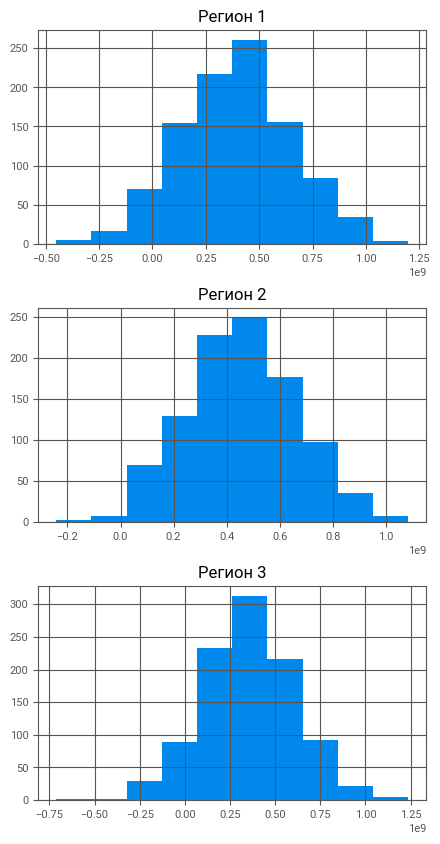

In [17]:
incomes.hist(figsize=(5, 10), layout=(3, 1))
plt.show()

Построим боксплот.

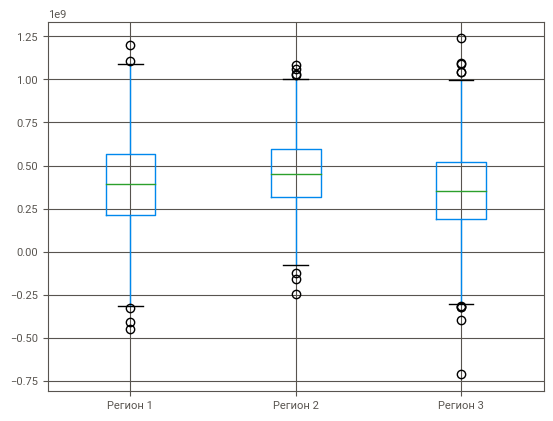

In [18]:
incomes.boxplot()
plt.show()

По гистограммам видно, что все распределения прибыли нормальные. Стоит обратить внимание, что в регионе 2 наименьший 'отрицательный хвост', означающий наименьшую убыточность региона, а по гистограмме "ящик с усами", что в этом же регионе наименьшая дисперсия.
Так же видно, что средние и медианы прибыли во всех регионах примерно одного порядка.

Найдем среднюю прибыль, 95%-й доверительный интервал прибыли и риск убытков в каждом регионе.

In [19]:
print('(В млн. рублей)')
# для удобситва переведем значения в миллионы рублей
incomes_mln = (incomes / 10 ** 6)
for region in range(n):
    print(f"Регион {region+1}. Средняя прибыль: {round(incomes_mln[f'Регион {region+1}'].mean())},",
          f"95%-й доверительный интервал: ({round(incomes_mln[f'Регион {region+1}'].quantile(0.025), 2)}, {round(incomes_mln[f'Регион {region+1}'].quantile(0.975), 2)}),",
          f"риск убытков: {100 * incomes_mln[incomes_mln[f'Регион {region+1}'] < 0][f'Регион {region+1}'].count() / samples_amount}%")

# 6. Общий вывод.

По результатам исследования можно сделать следующие выводы:

Было проведено исследование с целью построения математической модели и определения одного их трёх регионов, в котором добыча нефти принесёт наибольшую прибыль.\
Модель построена по данным трёх регионов: в каждом 100 000 значений признаков f0, f1, f2 и объём её запасов нефти данных признаков в product (тыс. баррелей).\
Данные были изучены и подготовленны к дальнейшим исследованиям.

Построена модель по всему объёму данных после разделения на обучающую и валидационную выборки.\
Обнаружено:\
Среднее значение запаса сырья по полному количеству скважин для каждого из регионов меньше, чем рассчитанная точка безубыточности: 111 тыс. баррелей. Средний запас ресурсов по регионам недостаточен даже для окупаемости вложений на разработку. Решение - вести разработку сразу всех скважин региона нерентабельно.
Целесообразно, с точки зрения бизнеса, из всех скважин региона выбрать с максимальными запасами и вкладывать деньги в их запуск и производственную деятельность.

Получены предсказания при помощи линейной регрессии, а так же применена техника Bootstrap с расчетом значения прибыли по регионам на 1000 выборок.
Рассчитан доверительный интервал получения прибыли в 95%.

Несмотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами (всего 68 тыс баррелей против 92 и 95), средняя доходность скважин в регионе 2 прогнозируется выше других, при наименьших рисках.

В настоящем исследовании показано, что наиболее перспективным и прибильным оказался регион №2.\
При наименьшей величине запасов на уровне 68 (тыс. баррелей), второй регион показывает наименьший риск (< 2.5%), а в действительности даже менее 1% c прибыльностью на уровне 440-460 (млн. руб.)

Подобный результат можно объяснить тем, что модель, обученная для 2 региона, имела гораздо меньшее RMSE по сравнению с моделями для остальных регионов. Поэтому данная модель чаще верно предсказывает, какие точки будут действительно содержать больше сырья, и удается выбрать наиболее удачные. Вероятно, скважины в этом регионе более "предсказуемые".